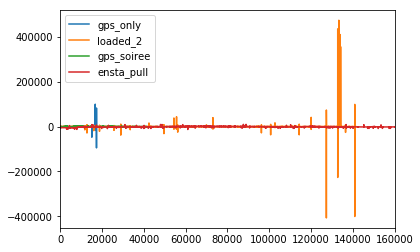

In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib

def load_data(file_name):
    df = pd.read_csv("Data/" + file_name + "_gologic_output-3.0.csv")
    df.drop(['accumulated_us'], axis=1, inplace=True)
    df.rename(columns={'delay_us': file_name}, inplace=True)
    df.columns
    
    return df

df1 = load_data("gps_only")
df2 = load_data("loaded_2")
df3 = load_data("gps_soiree")
# df3 = df3.iloc[0:5000]
df4 = load_data("ensta_pull")

df = pd.concat([df1, df2, df3, df4], axis=1)
df.head()

# df = df2

%matplotlib inline
df.plot()

In [2]:
df.count(axis=0)

gps_only       57790
loaded_2      141544
gps_soiree     41136
ensta_pull    160236
dtype: int64

Text(0,0.5,'Count')

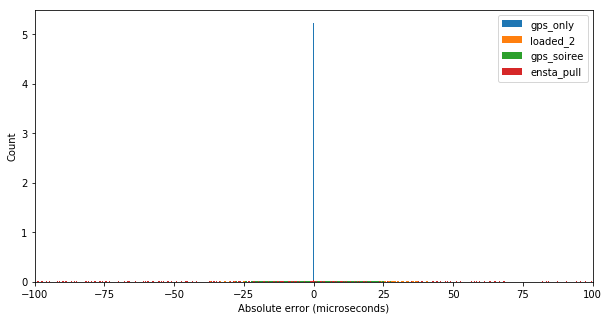

In [3]:
bin_limit = 100
step = 0.1
bins = list(np.arange(-bin_limit,bin_limit,step))

if df.min().min() < -bin_limit:
    bins = [df.min().min()] + bins
    
if df.max().max() > bin_limit:
    bins = bins + [df.max().max()]


plt.figure()
plot = df.plot(kind="hist", cumulative=False, bins=bins, figsize=(10,5), normed=True)
plot.set_xlim(-bin_limit, bin_limit)
plot.set_xlabel("Absolute error (microseconds)")
plot.set_ylabel("Count")
# plot.set_title(file_name)

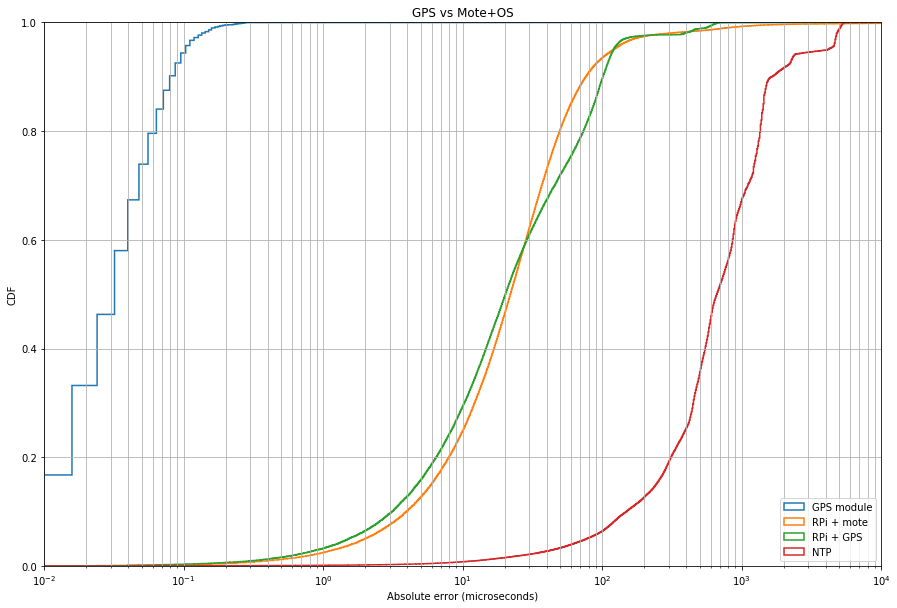

In [4]:
abs_delay = abs(df)

step = 10
# bins = list(np.arange(0,bin_limit,step))
bins = [10**x for x in np.arange(-3,4,0.005)]
    
if abs_delay.max().max() > bins[-1]:
    bins = bins + [abs_delay.max().max()/2, abs_delay.max().max()]
    
# bins = [0,10,20,100,1000000]
    
weights = abs_delay.div(abs_delay.sum(axis=0), axis=1)


plt.figure(figsize=(15,10))
plt.xscale("log")

for column in abs_delay.columns:
    data = abs_delay[column].dropna()
    
    legend = {
        "gps_only": "GPS module",
        "loaded_2": "RPi + mote",
        "ensta_pull": "NTP",
        "gps_soiree": "RPi + GPS"
    }
    
    _ = plt.hist(data, bins=bins, weights=np.ones_like(data)/data.count(), cumulative=True, histtype='step', fill=False, linewidth=1.5, alpha=1, label=legend[column])

# plt.xlim(50,10**4)
# plt.ylim(0.9,1)
plt.xlim(.01,10**4)
plt.ylim(0,1)
plt.xlabel("Absolute error (microseconds)")
plt.ylabel("CDF")
plt.title("GPS vs Mote+OS")
plt.legend(loc='lower right')

plt.grid(which="both")